# NETFLIX
---
0. NETFILX 소개
    - ....
1. 데이터 수집
    - Netflix_Data
    - Netflix_Original Data
    - Rating_Data
    - Netflix_Data + Netflix_Original Data + Rating_Data
2. 데이터 전처리
    - 결측치 수정 및 제거
    - Feature engineering
3. 데이터 EDA
    - Score, avg, total 먼저 비교 !! 
    
4. 결론

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings 
warnings.filterwarnings(action='ignore')


## 0. NETFILX 소개

<img align = "right" src ='https://itep.sfo2.digitaloceanspaces.com/Netflix-blog-cover.jpg'>

Net + Flicks = *NETFLIX*

1997년 8월 29일 설립

## 1. 데이터 수집
---


### Netflix_Data
</br>

__✅COLUMNS__
</br>

| SHOW_ID | 영화나 티비쇼의 고유번호  |
| --- | --- |
| TYPE | 영화인지 티비쇼인지 구별 |
| TITLE | 영화, 티비쇼의 제목 |
| DIRECTOR | 영화감독 |
| CAST | 영화, 쇼에 출연한 배우들 |
| COUNTRY | 영화나 쇼가 제작된 나라 |
| DATE_ADDED | 넷플릭스에 드라마나 영화가 방영된 날짜. 2008.01 ~ 2021.09.25 |
| RELEASE_YEAR | 실제 드라마나 영화가 방영된 연도. 1925 ~ 2021 |
| RATING | 영화/쇼의 시청 등급 |
| DURATION | 방영기간 |
| LISTED_IN | 장르 |
| DESCRIPTION | 줄거리 |



In [4]:
path = '../data'
Net_df = pd.read_csv(path+"/fixed_netflix_df.csv")
Net_df.head()

,show_id,type,director,title,cast,country,date_added,description,duration,listed_in,rating,release_year
0,s1,Movie,Kirsten Johnson,Dick Johnson Is Dead,"Michael Hilow, Dick Johnson, Chad Knorr, Vasth...",United States,"September 25, 2021","As her father nears the end of his life, filmm...",90 min,Documentaries,PG-13,2020
1,s2,TV Show,Nosipho Dumisa,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021","After crossing paths at a party, a Cape Town t...",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",TV-MA,2021
2,s3,TV Show,Julien Leclercq,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",To protect his family from a powerful drug lor...,1 Season,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,2021
3,s4,TV Show,Jacquelyn C. Migdal,Jailbirds New Orleans,NONE,United States,"September 24, 2021","Feuds, flirtations and toilet talk go down amo...",1 Season,"Docuseries, Reality TV",TV-MA,2021
4,s5,TV Show,Raghav Subbu,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",In a city of coaching centers known to train I...,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",TV-MA,2021


### Netflix_Original Data
__✅ COLUMNS__

In [6]:
OG = pd.read_csv(path+"/NetflixOriginals.csv", encoding="ISO-8859-1")
OG = OG["Title"].tolist()
OG[:10]

['Enter the Anime',
 'Dark Forces',
 'The App',
 'The Open House',
 'Kaali Khuhi',
 'Drive',
 'Leyla Everlasting',
 'The Last Days of American Crime',
 'Paradox',
 'Sardar Ka Grandson']

### Rating_Data
__✅ COLUMNS__

In [7]:
Rating_df = pd.read_csv(path+"/Netflix_Rating.csv")
Rating_df.head()

,Title,Avg,Total,Total_males,Total_Females,All_below_18,All_18_29,All_30_44,All_over_45,Males_below_18,...,Males_rank_below_18,Males_rank_18_29,Males_rank_30_44,Males_rank_over_45,Females_rank_below_18,Females_rank_18_29,Females_rank_30_44,Females_rank_over_45,Avg_rank_males,Avg_rank_Females
0,Dick Johnson Is Dead,7.4,6241.0,3780.0,592.0,12.0,1050.0,2321.0,817.0,10.0,...,7.9,7.7,7.4,7.1,8.0,7.8,7.4,7.3,7.4,7.5
1,Blood & Water,6.7,2952.0,603.0,867.0,10.0,416.0,644.0,281.0,4.0,...,5.5,6.6,5.9,4.9,5.0,6.9,7.0,7.0,5.9,7.0
2,Ganglands,7.0,2349.0,1297.0,117.0,1.0,99.0,574.0,648.0,1.0,...,6.0,6.9,6.8,7.0,0.0,5.8,6.9,7.0,6.9,7.0
3,Jailbirds New Orleans,6.7,194.0,57.0,60.0,0.0,19.0,63.0,30.0,0.0,...,0.0,6.4,6.3,6.6,0.0,6.2,6.9,6.9,6.5,6.9
4,Kota Factory,9.3,66527.0,19278.0,984.0,144.0,10004.0,5687.0,340.0,134.0,...,9.6,9.2,8.5,6.4,4.3,9.2,7.5,5.7,9.0,8.5


### Netflix_Data + Netflix_Original Data +  Rating_Data

In [8]:
# Netflix_Data + Netflix_Original Data 
og = []
for name in Net_df.title.values:
    if name in OG:
        og.append(1)
    else:
        og.append(0)

Net_df["Original"] = og
Net_df["Original"].value_counts()

0    8301
1     506
Name: Original, dtype: int64

In [9]:
df = pd.merge(Net_df, Rating_df, left_on= "title", right_on= "Title")
df.head()

,show_id,type,director,title,cast,country,date_added,description,duration,listed_in,...,Males_rank_below_18,Males_rank_18_29,Males_rank_30_44,Males_rank_over_45,Females_rank_below_18,Females_rank_18_29,Females_rank_30_44,Females_rank_over_45,Avg_rank_males,Avg_rank_Females
0,s1,Movie,Kirsten Johnson,Dick Johnson Is Dead,"Michael Hilow, Dick Johnson, Chad Knorr, Vasth...",United States,"September 25, 2021","As her father nears the end of his life, filmm...",90 min,Documentaries,...,7.9,7.7,7.4,7.1,8.0,7.8,7.4,7.3,7.4,7.5
1,s2,TV Show,Nosipho Dumisa,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021","After crossing paths at a party, a Cape Town t...",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,5.5,6.6,5.9,4.9,5.0,6.9,7.0,7.0,5.9,7.0
2,s3,TV Show,Julien Leclercq,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",To protect his family from a powerful drug lor...,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,6.0,6.9,6.8,7.0,0.0,5.8,6.9,7.0,6.9,7.0
3,s4,TV Show,Jacquelyn C. Migdal,Jailbirds New Orleans,NONE,United States,"September 24, 2021","Feuds, flirtations and toilet talk go down amo...",1 Season,"Docuseries, Reality TV",...,0.0,6.4,6.3,6.6,0.0,6.2,6.9,6.9,6.5,6.9
4,s5,TV Show,Raghav Subbu,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",In a city of coaching centers known to train I...,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",...,9.6,9.2,8.5,6.4,4.3,9.2,7.5,5.7,9.0,8.5


## 2. 데이터 전처리

- 결측치 수정 및 제거
    - 결측치 확인 및 크롤링으로 추가
    - 확인되지 않는 행 제거
    - 사용하지 않는 컬럼 제거
- Feature engineering
    - 영화 관람 등급, 티비 관람 등급
    - score(평점, 리뷰 수)...
        

### 결측치 수정 및 제거

In [11]:
# 밀린 데이터 채우고, 없는 데이터 제거
index = df[df['rating'] == '66 min'].index 
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

index = df[df['rating'] == '74 min'].index
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

index = df[df['rating'] == '84 min'].index
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

df.isnull().sum()

show_id                   0
type                      0
director                  0
title                     0
cast                      0
country                   0
date_added               10
description               0
duration                  0
listed_in                 0
rating                    7
release_year              0
Original                  0
Title                     0
Avg                       0
Total                     0
Total_males               0
Total_Females             0
All_below_18              0
All_18_29                 0
All_30_44                 0
All_over_45               0
Males_below_18            0
Males_18_29               0
Males_30_44               0
Males_over_45             0
Females_below_18          0
Females_18_29             0
Females_30_44             0
Females_over_45           0
Title_ID                  0
All_rank_below_18         0
All_rank_18_29            0
All_rank_30_44            0
All_rank_over_45          0
Males_rank_below_18 

In [12]:
# NOT FOUND 제거
df.drop(df[df["Title_ID"] == "NOT FOUND"].index, inplace=True)
df = df.reset_index(drop=True)

In [13]:
#NO RATINGS
df.drop(df[df["Avg"] == 0].index, inplace=True)
df.reset_index(drop=True)

,show_id,type,director,title,cast,country,date_added,description,duration,listed_in,...,Males_rank_below_18,Males_rank_18_29,Males_rank_30_44,Males_rank_over_45,Females_rank_below_18,Females_rank_18_29,Females_rank_30_44,Females_rank_over_45,Avg_rank_males,Avg_rank_Females
0,s1,Movie,Kirsten Johnson,Dick Johnson Is Dead,"Michael Hilow, Dick Johnson, Chad Knorr, Vasth...",United States,"September 25, 2021","As her father nears the end of his life, filmm...",90 min,Documentaries,...,7.9,7.7,7.4,7.1,8.0,7.8,7.4,7.3,7.4,7.5
1,s2,TV Show,Nosipho Dumisa,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021","After crossing paths at a party, a Cape Town t...",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,5.5,6.6,5.9,4.9,5.0,6.9,7.0,7.0,5.9,7.0
2,s3,TV Show,Julien Leclercq,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",To protect his family from a powerful drug lor...,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,6.0,6.9,6.8,7.0,0.0,5.8,6.9,7.0,6.9,7.0
3,s4,TV Show,Jacquelyn C. Migdal,Jailbirds New Orleans,NONE,United States,"September 24, 2021","Feuds, flirtations and toilet talk go down amo...",1 Season,"Docuseries, Reality TV",...,0.0,6.4,6.3,6.6,0.0,6.2,6.9,6.9,6.5,6.9
4,s5,TV Show,Raghav Subbu,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",In a city of coaching centers known to train I...,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",...,9.6,9.2,8.5,6.4,4.3,9.2,7.5,5.7,9.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8425,s8803,Movie,David Fincher,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019","A political cartoonist, a crime reporter and a...",158 min,"Cult Movies, Dramas, Thrillers",...,8.2,7.9,7.7,7.5,7.6,7.7,7.4,7.5,7.7,7.5
8426,s8804,TV Show,Jiyeon Park,Zombie Dumb,NONE,Production Company Project Page,"July 1, 2019","While living alone in a spooky town, a young g...",2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",...,0.0,3.5,8.0,0.0,0.0,0.0,0.0,10.0,5.0,10.0
8427,s8805,Movie,Ruben Fleischer,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",Looking to survive in a world taken over by zo...,88 min,"Comedies, Horror Movies",...,7.7,7.7,7.6,7.4,7.2,7.6,7.6,7.6,7.6,7.6
8428,s8806,Movie,Peter Hewitt,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020","Dragged from civilian life, a former superhero...",88 min,"Children & Family Movies, Comedies",...,3.1,4.0,3.9,4.6,0.0,5.2,4.9,5.5,4.2,5.2


In [14]:
# 없는 rating data 제거 , 8807 - 202 - 10(중복있을듯 아마...) = 8598 
df.drop(df[df["rating"].isnull()].index, inplace=True)
df = df.reset_index(drop=True)

In [15]:
# 사용하지 않는 컬럼 제거
# date_added
# show_id
# desciption
# Title_ID

df.drop([ "show_id", "Title", "Title_ID"], axis = 1, inplace=True)
df.head()

,type,director,title,cast,country,date_added,description,duration,listed_in,rating,...,Males_rank_below_18,Males_rank_18_29,Males_rank_30_44,Males_rank_over_45,Females_rank_below_18,Females_rank_18_29,Females_rank_30_44,Females_rank_over_45,Avg_rank_males,Avg_rank_Females
0,Movie,Kirsten Johnson,Dick Johnson Is Dead,"Michael Hilow, Dick Johnson, Chad Knorr, Vasth...",United States,"September 25, 2021","As her father nears the end of his life, filmm...",90 min,Documentaries,PG-13,...,7.9,7.7,7.4,7.1,8.0,7.8,7.4,7.3,7.4,7.5
1,TV Show,Nosipho Dumisa,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021","After crossing paths at a party, a Cape Town t...",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",TV-MA,...,5.5,6.6,5.9,4.9,5.0,6.9,7.0,7.0,5.9,7.0
2,TV Show,Julien Leclercq,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",To protect his family from a powerful drug lor...,1 Season,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,...,6.0,6.9,6.8,7.0,0.0,5.8,6.9,7.0,6.9,7.0
3,TV Show,Jacquelyn C. Migdal,Jailbirds New Orleans,NONE,United States,"September 24, 2021","Feuds, flirtations and toilet talk go down amo...",1 Season,"Docuseries, Reality TV",TV-MA,...,0.0,6.4,6.3,6.6,0.0,6.2,6.9,6.9,6.5,6.9
4,TV Show,Raghav Subbu,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",In a city of coaching centers known to train I...,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",TV-MA,...,9.6,9.2,8.5,6.4,4.3,9.2,7.5,5.7,9.0,8.5


In [16]:
# 최종 데이터
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8423 entries, 0 to 8422
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type                   8423 non-null   object 
 1   director               8423 non-null   object 
 2   title                  8423 non-null   object 
 3   cast                   8423 non-null   object 
 4   country                8423 non-null   object 
 5   date_added             8413 non-null   object 
 6   description            8423 non-null   object 
 7   duration               8423 non-null   object 
 8   listed_in              8423 non-null   object 
 9   rating                 8423 non-null   object 
 10  release_year           8423 non-null   int64  
 11  Original               8423 non-null   int64  
 12  Avg                    8423 non-null   float64
 13  Total                  8423 non-null   float64
 14  Total_males            8423 non-null   float64
 15  Tota

### Feature engineering

type columns
- 영화: 0
- 티비쇼: 1

In [17]:
def type_col(col):
    if col == 'Movie':
        return 0
    else:
        return 1
    

In [18]:
df['type'] = df["type"].apply(type_col)
df.head()

,type,director,title,cast,country,date_added,description,duration,listed_in,rating,...,Males_rank_below_18,Males_rank_18_29,Males_rank_30_44,Males_rank_over_45,Females_rank_below_18,Females_rank_18_29,Females_rank_30_44,Females_rank_over_45,Avg_rank_males,Avg_rank_Females
0,0,Kirsten Johnson,Dick Johnson Is Dead,"Michael Hilow, Dick Johnson, Chad Knorr, Vasth...",United States,"September 25, 2021","As her father nears the end of his life, filmm...",90 min,Documentaries,PG-13,...,7.9,7.7,7.4,7.1,8.0,7.8,7.4,7.3,7.4,7.5
1,1,Nosipho Dumisa,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021","After crossing paths at a party, a Cape Town t...",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",TV-MA,...,5.5,6.6,5.9,4.9,5.0,6.9,7.0,7.0,5.9,7.0
2,1,Julien Leclercq,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",To protect his family from a powerful drug lor...,1 Season,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,...,6.0,6.9,6.8,7.0,0.0,5.8,6.9,7.0,6.9,7.0
3,1,Jacquelyn C. Migdal,Jailbirds New Orleans,NONE,United States,"September 24, 2021","Feuds, flirtations and toilet talk go down amo...",1 Season,"Docuseries, Reality TV",TV-MA,...,0.0,6.4,6.3,6.6,0.0,6.2,6.9,6.9,6.5,6.9
4,1,Raghav Subbu,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",In a city of coaching centers known to train I...,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",TV-MA,...,9.6,9.2,8.5,6.4,4.3,9.2,7.5,5.7,9.0,8.5


rating col
- 전체관람가('G', 'PG', 'TV-Y', 'TV-7', 'TV-Y7-FV', 'TV-G'): 0
- 12,15세 관람가('PG-13', 'TV-PG', 'TV-14'): 1
- 15, 청불('R', 'NC-17', 'NR', 'UR', 'TV-MA'): 2 

In [19]:
def rating_col(col):
    if col in ['G', 'PG', 'TV-Y','TV-Y7', 'TV-Y7-FV', 'TV-G']:
        return 0
    elif col in ['PG-13', 'TV-PG', 'TV-14']:
        return 1
    elif col in ['R', 'NC-17', 'NR', 'UR', 'TV-MA']:
        return 2
    else:
        return col

In [20]:
df['rating'] = df["rating"].apply(rating_col)
df['rating']

0       1
1       2
2       2
3       2
4       2
       ..
8418    2
8419    0
8420    2
8421    0
8422    1
Name: rating, Length: 8423, dtype: int64

### Score : 평점 * 리뷰 수

In [21]:
df["Score"] = df["Avg"] * df["Total"] 
df["Score_normal"] = (df["Score"] - df["Score"].mean())/df["Score"].std() + 1 #정규화

### 주식데이터 사용하기

In [22]:
df.columns

Index(['type', 'director', 'title', 'cast', 'country', 'date_added',
       'description', 'duration', 'listed_in', 'rating', 'release_year',
       'Original', 'Avg', 'Total', 'Total_males', 'Total_Females',
       'All_below_18', 'All_18_29', 'All_30_44', 'All_over_45',
       'Males_below_18', 'Males_18_29', 'Males_30_44', 'Males_over_45',
       'Females_below_18', 'Females_18_29', 'Females_30_44', 'Females_over_45',
       'All_rank_below_18', 'All_rank_18_29', 'All_rank_30_44',
       'All_rank_over_45', 'Males_rank_below_18', 'Males_rank_18_29',
       'Males_rank_30_44', 'Males_rank_over_45', 'Females_rank_below_18',
       'Females_rank_18_29', 'Females_rank_30_44', 'Females_rank_over_45',
       'Avg_rank_males', 'Avg_rank_Females', 'Score', 'Score_normal'],
      dtype='object')

In [23]:
df2 = df.__deepcopy__()

In [24]:
df2['date_added'] = df2['date_added'].astype('datetime64')

In [25]:
df2[df2['date_added'].isna()]

,type,director,title,cast,country,date_added,description,duration,listed_in,rating,...,Males_rank_30_44,Males_rank_over_45,Females_rank_below_18,Females_rank_18_29,Females_rank_30_44,Females_rank_over_45,Avg_rank_males,Avg_rank_Females,Score,Score_normal
5796,1,Alex Hardcastle,A Young Doctor's Notebook and Other Stories,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,"Set during the Russian Revolution, this comic ...",2 Seasons,"British TV Shows, TV Comedies, TV Dramas",2,...,7.7,7.4,0.0,8.0,7.9,7.8,7.7,7.9,121313.4,0.872463
5903,1,Tom Vitale,Anthony Bourdain: Parts Unknown,Anthony Bourdain,United States,NaT,This CNN original series has chef Anthony Bour...,5 Seasons,Docuseries,1,...,8.8,8.4,5.0,8.8,8.8,8.7,8.8,8.8,52078.4,0.794763
6494,1,David Lee,Frasier,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,Frasier Crane is a snooty but lovable Seattle ...,11 Seasons,"Classic & Cult TV, TV Comedies",1,...,8.1,8.2,6.8,8.0,8.1,8.5,8.2,8.2,664839.6,1.482441
6505,1,Gary Halvorson,Friends,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,This hit sitcom follows the merry misadventure...,10 Seasons,"Classic & Cult TV, TV Comedies",1,...,8.9,8.1,7.7,9.4,9.2,8.5,8.9,9.2,8452476.0,10.222208
6598,1,Morio Asaka,Gunslinger Girl,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,"On the surface, the Social Welfare Agency appe...",2 Seasons,"Anime Series, Crime TV Shows",1,...,7.3,7.8,0.0,7.6,7.6,7.2,7.4,7.6,16235.6,0.754538
6880,1,Anatoliy Prokhorov,Kikoriki,Igor Dmitriev,Russia,NaT,A wacky rabbit and his gang of animal pals hav...,2 Seasons,Kids' TV,0,...,7.5,8.0,0.0,7.6,7.9,7.6,7.6,7.8,7129.2,0.744318
6929,1,Jorge Garza,La Familia P. Luche,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,"This irreverent sitcom featues Ludovico, Feder...",3 Seasons,"International TV Shows, Spanish-Language TV Sh...",1,...,7.6,7.1,7.0,8.4,7.8,9.4,7.7,8.3,7082.4,0.744265
7070,1,Bobcat Goldthwait,Maron,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,"Marc Maron stars as Marc Maron, who interviews...",4 Seasons,TV Comedies,2,...,7.7,7.7,7.0,8.1,7.3,7.3,7.7,7.4,37837.8,0.778781
7488,1,Burnie Burns,Red vs. Blue,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,"This parody of first-person shooter games, mil...",13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",2,...,8.4,7.1,3.0,8.4,8.8,6.7,8.3,8.4,78304.8,0.824196
7817,1,Luke Jurevicius,The Adventures of Figaro Pho,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,"Imagine your worst fears, then multiply them: ...",2 Seasons,"Kids' TV, TV Comedies",0,...,7.2,7.6,0.0,7.7,7.9,6.9,7.4,7.6,1200.8,0.737665


In [26]:
df2.drop(df2[df2["date_added"].isnull()].index, inplace=True)
df2 = df2.reset_index(drop=True)

In [27]:
df2['year'] = df2['date_added'].dt.strftime('%Y')

In [29]:
stock_data = pd.read_csv(path+'/netflix_stock.csv').iloc[:,1:]

In [30]:
stock_data

,Date,Close,Open,High,Low,Volume,Change
0,2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-01-02,3.76,3.79,3.89,3.66,12530000.0,-0.0105
2,2008-01-03,3.72,3.99,4.04,3.66,21340000.0,-0.0106
3,2008-01-04,3.52,3.72,3.80,3.48,17210000.0,-0.0538
4,2008-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5109,2021-12-27,613.12,615.00,615.00,609.25,1860000.0,-0.0016
5110,2021-12-28,610.71,614.95,618.41,609.69,1850000.0,-0.0039
5111,2021-12-29,610.54,610.71,613.98,604.68,1280000.0,-0.0003
5112,2021-12-30,612.09,612.99,620.61,611.24,1610000.0,0.0025


In [31]:
stock_data['Date'] = stock_data['Date'].astype('datetime64')

In [32]:
stock_data['year'] = stock_data['Date'].dt.year

In [33]:
stock_data.groupby('year').mean()['Close'].index

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021],
           dtype='int64', name='year')

In [34]:
df2.groupby('year').count().index.astype(int)

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021],
           dtype='int64', name='year')

In [35]:
df2.groupby('year').sum()['Original']/df2.groupby('year').size()

year
2008    0.000000
2009    0.000000
2010    0.000000
2011    0.000000
2012    0.000000
2013    0.000000
2014    0.000000
2015    0.131579
2016    0.068966
2017    0.047069
2018    0.052130
2019    0.054404
2020    0.087452
2021    0.044840
dtype: float64

In [36]:
df2.groupby('year').size()

year
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      76
2016     406
2017    1126
2018    1573
2019    1930
2020    1841
2021    1405
dtype: int64

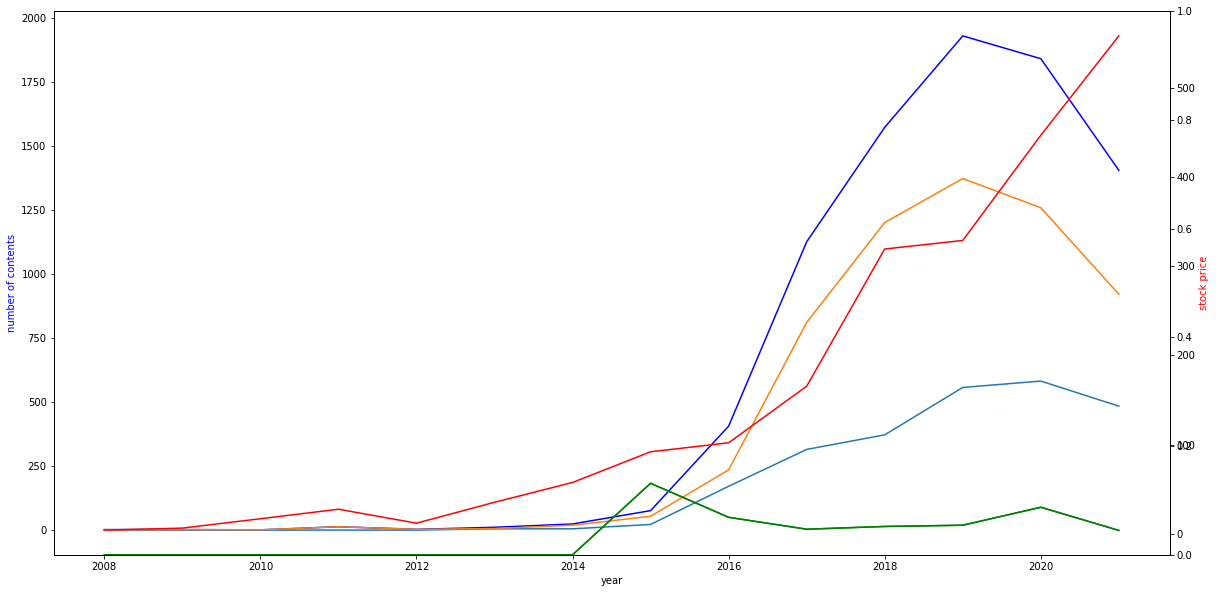

In [39]:

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(df2.groupby('year').count().index.astype(int),df2.groupby('year').size(),color = color1)
ax1.plot(df2.groupby('year').count().index.astype(int),df2.groupby('year').sum()['type'])
ax1.plot(df2.groupby('year').count().index.astype(int),df2.groupby('year').size()-df2.groupby('year').sum()['type'])
ax1.set_xlabel('year')
ax1.set_ylabel('number of contents',color = color1)


color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(stock_data.groupby('year').mean()['Close'].index,stock_data.groupby('year').mean()['Close'],color=color2)
ax2.set_ylabel('stock price',color = color2)

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(stock_data.groupby('year').mean()['Close'].index,df2.groupby('year').sum()['Original']/df2.groupby('year').size(),color=color3)
ax3.plot(stock_data.groupby('year').mean()['Close'].index,df2.groupby('year').sum()['Original']/df2.groupby('year').size(),color=color3)

ax3.set_ylim([0,1])
plt.show()

In [ ]:
# 연도별로 각 장르가 몇개인지
# 연도별로 데이터 추출
# 각 장르의 숫자 추출

In [40]:
for i in range(2008,2022):
    print(i)
    df2.loc[df2['year']==str(i)]

2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [ ]:
fig = plt.figure(figsize=(20,10))
plt.

In [ ]:
df2['listed_in'].nunique()

In [ ]:
fig = plt.figure(figsize=(20,10))

In [ ]:
a

In [ ]:
# min 열만 가져오기
duration_col = df['duration'].str.endswith('min')

In [ ]:
mins_duration = df[duration_col]
mins_duration.head()

In [ ]:
m = []
for x,_ in df[duration_col]["duration"].str.split(" "):
    m.append(int(x))
    

In [ ]:
mins_duration["duration_int"] = m
mins_duration.head()


In [ ]:
print("min :" , sorted(m)[0])
print("max :", sorted(m)[-1])

In [ ]:
bins = [0,30,50,70,90,110,130,150,320]
dic_label = {1:"0-29", 2:"30-49", 
            3:"50-69", 4:"70-89",
            5:"60-109", 6:"110-129",
            7:"130-149", 8:"150-"}

# label = [1,2,3,4,5,6,7,8]

mins_duration["duration_cate"] = pd.cut(mins_duration["duration_int"], bins = bins, labels = dic_label.values())
mins_duration["duration_cate"].value_counts()

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(121)
sns.barplot(x = mins_duration["duration_cate"].unique(), y = mins_duration["duration_cate"].value_counts(), palette = 'RdPu' )
# plt.plot(x,y, color = "forestgreen", marker = 'o', linewidth = 2)
plt.ylabel("cnt", fontsize = 20 )
plt.xticks(fontsize = 10)
plt.title("Duration(min) Barplot", fontsize = 20, color = "white")

plt.subplot(122)
plt.boxplot(x = mins_duration["duration_cate"].value_counts())
plt.xlabel("cnt", fontsize = 20 )
plt.title("Duration(min) Boxplot", fontsize = 20, color = "white")
plt.xticks(fontsize = 10)

plt.show()

In [ ]:
plt.figure(figsize=(15,8))
aa =df.loc[df['duration'].str.endswith('min'),'duration'] 
aa = [int(x[:-4]) for x in aa] 

plt.subplot(121)
plt.hist(aa)
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330]) 

plt.subplot(122)
plt.boxplot(aa)
plt.show()

In [ ]:
country = df['country'].dropna().unique()

country_list = []
for x in country:
    list_1 = x.split(',')
    for y in list_1:
        if y.strip() in country_list:
            continue
        else:
            country_list.append(y.strip())

In [ ]:
df2['country']  = df2['country'].apply(lambda x: x.split(','))

country_count = {x:0 for x in country_list}

In [ ]:
df2['country']  = df2['country'].apply(lambda x: x.split(','))

country_count = {x:0 for x in country_list}
for x in range(len(df)):
   for y in df['listed_in'][x]:
       country_count[y.strip()]

In [ ]:
country_count

In [ ]:
country_list

In [ ]:
# listed_in columns을 중복제거 후 ','로 split해서 딕셔너리에 저장
# 장르별 duration 확인
listin = df['listed_in'].dropna().unique()

listin_list = []
for x in listin:
    list_1 = x.split(',')
    for y in list_1:
        if y.strip() in listin_list:
            continue
        else:
            listin_list.append(y.strip())
listin_list
df['listed_in']  = df['listed_in'].apply(lambda x: x.split(','))

bb = {x:[] for x in listin_list}
for x in range(len(df)):
   for y in df['listed_in'][x]:
       bb[y.strip()].append(df['duration'][x])

In [ ]:
listin_list

In [ ]:
len(listin_list)

In [ ]:
bb

In [ ]:
# season, min 혼용된 listed_in 확인 
for i in bb:
    if all([x.endswith('min') for x in bb[i]]) != any([x.endswith('min') for x in bb[i]]):
        print(i)

In [ ]:
count=0
min_gen=[]
for i in bb:
    if all([x.endswith('min') for x in bb[i]]) == True:
        count+=1
        min_gen.append(i)


fig,ax = plt.subplots(3,3,figsize =(20,50))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.3)

len(bb)
j=0
for i in bb:
    if j==9:break
    hist_data = [int(x.split(' ')[0]) for x in bb[i]]
    ax[j//3,j%3].hist(hist_data)
    ax[j//3,j%3].set_title(i)

    j+=1